In [1]:
#previsão de preços futuro S&P500 e Bovespa

In [2]:
#!pip install yfinance

In [3]:
#importe das bibliotecas
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import yfinance as yf
plt.style.use('fivethirtyeight')

In [4]:
df = yf.download("PETR4.SA", start='2020-12-21')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-21,27.190001,27.490000,26.520000,27.020000,21.961641,99988800
2020-12-22,27.200001,27.469999,27.049999,27.280001,22.172966,46513200
2020-12-23,27.430000,28.250000,27.350000,27.950001,22.717539,49038900
2020-12-28,28.360001,28.520000,28.180000,28.180000,22.904480,36313300
2020-12-29,28.379999,28.430000,27.990000,28.270000,22.977631,29891100
...,...,...,...,...,...,...
2021-12-23,28.330000,28.420000,28.150000,28.330000,28.330000,28713600
2021-12-27,28.320000,28.780001,28.150000,28.750000,28.750000,44227900
2021-12-28,29.010000,29.280001,28.700001,28.780001,28.780001,30688100


In [5]:
df['Date'] = df.index
df

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2020-12-21,27.190001,27.490000,26.520000,27.020000,21.961641,99988800,2020-12-21
2020-12-22,27.200001,27.469999,27.049999,27.280001,22.172966,46513200,2020-12-22
2020-12-23,27.430000,28.250000,27.350000,27.950001,22.717539,49038900,2020-12-23
2020-12-28,28.360001,28.520000,28.180000,28.180000,22.904480,36313300,2020-12-28
2020-12-29,28.379999,28.430000,27.990000,28.270000,22.977631,29891100,2020-12-29
...,...,...,...,...,...,...,...
2021-12-23,28.330000,28.420000,28.150000,28.330000,28.330000,28713600,2021-12-23
2021-12-27,28.320000,28.780001,28.150000,28.750000,28.750000,44227900,2021-12-27
2021-12-28,29.010000,29.280001,28.700001,28.780001,28.780001,30688100,2021-12-28


In [6]:
df1 = df.copy()

df1['Numbers'] = list(range(0,len(df1)))

X = np.array(df1[['Numbers']])
y = df1['Adj Close'].values

lin_model = LinearRegression().fit(X,y)

print('Interceptar:' , lin_model.intercept_)
print('Declive:' , lin_model.coef_)

Interceptar: 19.942870219234422
Declive: [0.02535773]


Text(0.5, 1.0, 'Preço Historico 2021')

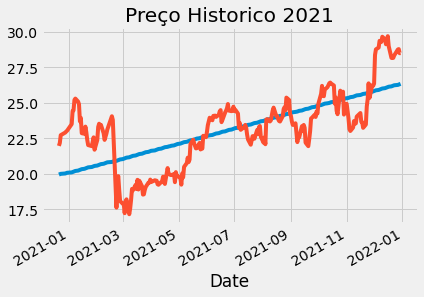

In [7]:
#y = mx + b
y_pred = lin_model.coef_ * X + lin_model.intercept_

df1['Pred'] = y_pred

df1['Pred'].plot()
df1['Adj Close'].plot()
plt.title ('Preço Historico 2021')

In [8]:
r2_score(df1['Close'],df1['Pred'])

-2.995211535832925

In [9]:
lin_model.coef_ * len(df1)+1+ lin_model.intercept_

array([27.35837527])